In [171]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score, average_precision_score, confusion_matrix, precision_score
from dmba import stepwise_selection,regressionSummary
from dmba import adjusted_r2_score, AIC_score, BIC_score
from datascience import *
import warnings
warnings.simplefilter('ignore', FutureWarning)
%matplotlib inline
from sklearn import preprocessing
import plotly.express as px

Read the dataset into table called data

In [172]:
Data=pd.read_csv('Life Expectancy Data.csv')

In [173]:
Data.columns = Data.columns.str.replace(" ", '-')
Data=Data.dropna()

In [174]:
Data.columns

Index(['Country', 'Year', 'Status', 'Life-expectancy-', 'Adult-Mortality',
       'infant-deaths', 'Alcohol', 'percentage-expenditure', 'Hepatitis-B',
       'Measles-', '-BMI-', 'under-five-deaths-', 'Polio', 'Total-expenditure',
       'Diphtheria-', '-HIV/AIDS', 'GDP', 'Population',
       '-thinness--1-19-years', '-thinness-5-9-years',
       'Income-composition-of-resources', 'Schooling'],
      dtype='object')

In [175]:
Data

,Country,Year,Status,Life-expectancy-,Adult-Mortality,infant-deaths,Alcohol,percentage-expenditure,Hepatitis-B,Measles-,...,Polio,Total-expenditure,Diphtheria-,-HIV/AIDS,GDP,Population,-thinness--1-19-years,-thinness-5-9-years,Income-composition-of-resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Describe some of the summary statistics 

In [176]:
DF=pd.DataFrame(Data.describe())
DF

,Year,Life-expectancy-,Adult-Mortality,infant-deaths,Alcohol,percentage-expenditure,Hepatitis-B,Measles-,-BMI-,under-five-deaths-,Polio,Total-expenditure,Diphtheria-,-HIV/AIDS,GDP,Population,-thinness--1-19-years,-thinness-5-9-years,Income-composition-of-resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


Visualization 1: Distribution of Life-expectancy- 

[Text(0.5, 1.0, 'Life Expectancy Distribution')]

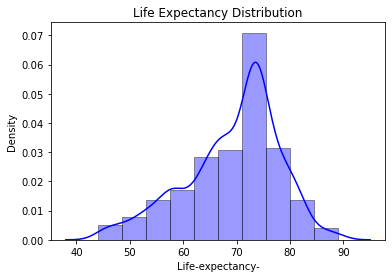

In [213]:
import seaborn as sns
sns.distplot(a=Data['Life-expectancy-'],bins=10,hist=True,color='blue').set(title='Life Expectancy Distribution')#generating histogram for quality variable with other variables

Visualization 2: Line chart for afganisthan 

Text(0, 0.5, 'Avg Life expectancy')

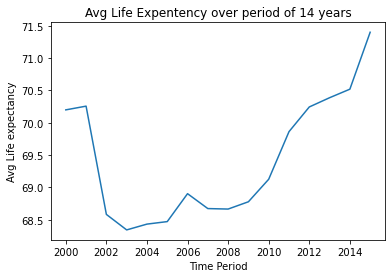

In [178]:
plt.plot(Data.groupby(by=['Year'])['Life-expectancy-'].mean())
plt.title('Avg Life Expentency over period of 14 years')
plt.xlabel('Time Period')
plt.ylabel('Avg Life expectancy')

Countries with their average Life expectancy over 10 years

In [179]:
d1=pd.DataFrame(Data.groupby(by=['Country'])['Life-expectancy-'].mean())
d1

,Life-expectancy-
Country,
Afghanistan,58.193750
Albania,75.156250
Algeria,74.209091
Angola,50.675000
Argentina,75.238462
...,...
Uruguay,76.013333
Uzbekistan,68.046154
Vanuatu,71.346667


Visualization 3: Line chart for differnt countries

In [180]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets 

def country(country1):
    country1_table = Data[Data['Country'] == country1]
    plt.plot(country1_table['Year'],country1_table['Life-expectancy-'])
    plt.title('Life expectancy of ' + country1)
    plt.ylabel('Number of Years')
    plt.show()

country_array= Data['Country'].unique()
country1=interact(country,country1=widgets.Dropdown(options=list(country_array),value='Afghanistan'))
# This intractive vizualisation doesnt display offline need to execute to run it

interactive(children=(Dropdown(description='country1', options=('Afghanistan', 'Albania', 'Algeria', 'Angola',…

Visualization 4: Bar chart for AVg comparing prevalence of diseases in developed countries vs developing countries

Text(0, 0.5, 'percentage of prevalence')

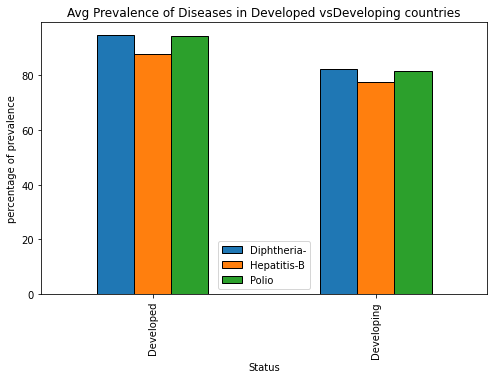

In [181]:
grouped_data=Data.groupby(by=['Status'])['Diphtheria-','Hepatitis-B','Polio'].mean()
grouped_data.plot(kind='bar',figsize=(8,5))
plt.title('Avg Prevalence of Diseases in Developed vsDeveloping countries')
plt.ylabel('percentage of prevalence')

Divide Dataset into 80 %, 20% for training and testing

In [140]:
x=Data.drop(columns=['Life-expectancy-','Country','Status'])
y=Data['Life-expectancy-']
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [141]:
df=Data.drop(columns=['Country','Status'])

Stepwise selection technique 

In [142]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_x[variables]), model)

In [143]:
best_model, best_variables = stepwise_selection(train_x.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: Year, Adult-Mortality, infant-deaths, Alcohol, percentage-expenditure, Hepatitis-B, Measles-, -BMI-, under-five-deaths-, Polio, Total-expenditure, Diphtheria-, -HIV/AIDS, GDP, Population, -thinness--1-19-years, -thinness-5-9-years, Income-composition-of-resources, Schooling
Start: score=9507.08, constant
Step: score=8502.12, add Schooling
Step: score=7734.61, add -HIV/AIDS
Step: score=7429.98, add Adult-Mortality
Step: score=7299.05, add Income-composition-of-resources
Step: score=7263.46, add percentage-expenditure
Step: score=7232.72, add -BMI-
Step: score=7216.02, add Diphtheria-
Step: score=7199.78, add Year
Step: score=7178.70, add Alcohol
Step: score=7169.16, add -thinness--1-19-years
Step: score=7166.14, add Total-expenditure
Step: score=7165.47, add under-five-deaths-
Step: score=7106.28, add infant-deaths
Step: score=7106.28, unchanged None
['Schooling', '-HIV/AIDS', 'Adult-Mortality', 'Income-composition-of-resources', 'percentage-expenditure', '-BMI-', 'Diphtheria

Standardizing Data to ignore errors from units

In [144]:
predictors=Data[best_variables]
predictors=preprocessing.scale(predictors)
predictors

array([[-0.72279909, -0.31238861,  0.75662881, ...,  0.95884047,
         0.23813448,  0.24374477],
       [-0.75858316, -0.31238861,  0.82048963, ...,  0.96754109,
         0.2565565 ,  0.26029961],
       [-0.79436723, -0.31238861,  0.79654182, ...,  0.94578955,
         0.27497852,  0.27685446],
       ...,
       [-0.75858316,  6.27078035, -0.76006583, ...,  0.24974036,
        -0.02591446, -0.0625199 ],
       [-0.8301513 ,  6.65217301,  4.13327002, ...,  0.08877899,
        -0.03205513, -0.0625199 ],
       [-0.8301513 ,  6.88432506,  3.96563535, ...,  0.49770789,
        -0.03205513, -0.07079732]])

Standardised data is divide for Traing and Testing of Linear Regression 

In [145]:
train_x, valid_x, train_y, valid_y = train_test_split(predictors, y, test_size=0.2, random_state=42)

In [146]:
reg=LinearRegression()

Training Model:

In [147]:
reg.fit(train_x,train_y)

LinearRegression()

In [148]:
# print coefficients
print('intercept ', reg.intercept_)
print(pd.DataFrame({'Predictor': best_variables, 'coefficient': reg.coef_}))

# print performance measures
regressionSummary(train_y, reg.predict(train_x))

intercept  69.2455372394743
                          Predictor  coefficient
0                         Schooling     2.776570
1                         -HIV/AIDS    -2.663320
2                   Adult-Mortality    -2.068080
3   Income-composition-of-resources     1.748144
4            percentage-expenditure     0.810455
5                             -BMI-     0.528535
6                       Diphtheria-     0.323201
7                              Year    -0.482134
8                           Alcohol    -0.469647
9             -thinness--1-19-years    -0.354306
10                Total-expenditure     0.254357
11               under-five-deaths-   -11.118874
12                    infant-deaths    10.919818

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 3.5378
            Mean Absolute Error (MAE) : 2.7165
          Mean Percentage Error (MPE) : -0.2773
Mean Absolute Percentage Error (MAPE) : 4.0746


Actual Values compared aginst predicted

In [149]:
y_pred=reg.predict(valid_x)
result=pd.DataFrame({'Predicted':y_pred,'Actaul' :valid_y,'Residual':y_pred-valid_y})
result

,Predicted,Actaul,Residual
1210,71.750340,67.5,4.250340
2273,73.051734,73.8,-0.748266
1005,80.614141,79.1,1.514141
2926,54.347859,54.9,-0.552141
518,51.876783,48.6,3.276783
...,...,...,...
1453,77.868583,71.0,6.868583
2821,77.372844,75.4,1.972844
483,60.385758,55.9,4.485758
290,67.395978,69.1,-1.704022


adjusted r2:

In [150]:
print('adjusted r2 : ', adjusted_r2_score(valid_y, y_pred, reg)*100)

adjusted r2 :  80.89455383082898


In [214]:
regressionSummary(valid_y, reg.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 0.2837
       Root Mean Squared Error (RMSE) : 3.6101
            Mean Absolute Error (MAE) : 2.7412
          Mean Percentage Error (MPE) : 0.0835
Mean Absolute Percentage Error (MAPE) : 4.1037
